In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv('/content/loan-recovery.csv')

In [ ]:
print(data.head())

  Borrower_ID  Age  Gender Employment_Type  Monthly_Income  Num_Dependents  \
0       BRW_1   59    Male        Salaried          215422               0   
1       BRW_2   49  Female        Salaried           60893               0   
2       BRW_3   35    Male        Salaried          116520               1   
3       BRW_4   63  Female        Salaried          140818               2   
4       BRW_5   28    Male        Salaried           76272               1   

  Loan_ID  Loan_Amount  Loan_Tenure  Interest_Rate  ... Collateral_Value  \
0    LN_1      1445796           60          12.39  ...     1.727997e+06   
1    LN_2      1044620           12          13.47  ...     1.180032e+06   
2    LN_3      1923410           72           7.74  ...     2.622540e+06   
3    LN_4      1811663           36          12.23  ...     1.145493e+06   
4    LN_5        88578           48          16.13  ...     0.000000e+00   

   Outstanding_Loan_Amount  Monthly_EMI  Payment_History Num_Missed_Paymen

In [ ]:
data.isnull().sum()

,0
Borrower_ID,0
Age,0
Gender,0
Employment_Type,0
Monthly_Income,0
Num_Dependents,0
Loan_ID,0
Loan_Amount,0
Loan_Tenure,0
Interest_Rate,0


In [ ]:
data.describe()

,Age,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Num_Missed_Payments,Days_Past_Due,Collection_Attempts
count,500.000000,500.000000,500.000000,5.000000e+02,500.00000,500.000000,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,43.116000,134829.920000,1.476000,1.024907e+06,46.10400,11.192820,6.032240e+05,5.627260e+05,15861.536020,1.912000,70.678000,3.000000
std,12.733217,68969.356746,1.145447,5.907556e+05,18.23706,3.775209,7.457131e+05,4.723581e+05,18709.231315,2.110252,60.211038,2.807805
min,21.000000,15207.000000,0.000000,5.413800e+04,12.00000,5.020000,0.000000e+00,1.571283e+04,261.880000,0.000000,0.000000,0.000000
25%,32.000000,76343.250000,0.000000,4.629848e+05,36.00000,7.907500,0.000000e+00,1.822072e+05,4039.097500,1.000000,4.000000,1.000000
50%,44.000000,134929.500000,1.000000,9.971240e+05,48.00000,10.915000,2.327684e+05,4.133240e+05,9330.170000,2.000000,66.500000,2.000000
75%,53.000000,193086.250000,3.000000,1.557952e+06,60.00000,14.577500,1.111106e+06,8.324787e+05,20439.485000,3.000000,122.250000,4.000000
max,64.000000,249746.000000,3.000000,1.995325e+06,72.00000,17.970000,2.744395e+06,1.932396e+06,127849.230000,12.000000,180.000000,10.000000


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd


fig = px.histogram(data, x='Loan_Amount', nbins=30, marginal="violin", opacity=0.7,
                   title="Loan Amount Distribution & Relationship with Monthly Income",
                   labels={'Loan_Amount': "Loan Amount (in $)", 'Monthly_Income': "Monthly Income"},
                   color_discrete_sequence=["royalblue"])

fig.add_trace(go.Scatter(
    x=sorted(data['Loan_Amount']),
    y=px.histogram(data, x='Loan_Amount', nbins=30, histnorm='probability density').data[0]['y'],
    mode='lines',
    name='Density Curve',
    line=dict(color='red', width=2)
))

scatter = px.scatter(data, x='Loan_Amount', y='Monthly_Income',
                     color='Loan_Amount', color_continuous_scale='Viridis',
                     size=data['Loan_Amount'], hover_name=data.index)

for trace in scatter.data:
    fig.add_trace(trace)

fig.update_layout(
    annotations=[
        dict(
            x=max(data['Loan_Amount']) * 0.8, y=max(data['Monthly_Income']),
            text="Higher Loan Amounts are linked to Higher Income Levels",
            showarrow=True,
            arrowhead=2,
            font=dict(size=12, color="red")
        )
    ],
    xaxis_title="Loan Amount (in $)",
    yaxis_title="Monthly Income (in $)",
    template="plotly_white",
    showlegend=True
)

fig.show()

In [ ]:
fig= px.histogram(data, x= 'Payment_History', color = 'Recovery_Status', barmode= 'group', title = 'How Payment History Affects Loan Recovery Status',
                  labels = {'Payment_History': 'Payment History', 'count': 'Number of Loans'}, color_discrete_map={"Recovered": "green", "Not Recovered": "red"})
fig.update_layout(
    xaxis_title='Payment History',
    yaxis_title='Number of Loans',
    legend_title='Recovery Status',
    template='plotly_white'
)
fig.show()

In [ ]:
fig = px.box(data, x="Recovery_Status", y="Num_Missed_Payments",
             title="How Missed Payments Affect Loan Recovery Status",
             labels={"Recovery_Status": "Recovery Status", "Num_Missed_Payments": "Number of Missed Payments"},
             color="Recovery_Status",
             color_discrete_map={"Recovered": "green", "Not Recovered": "red"},
             points="all")

fig.update_layout(
    xaxis_title="Recovery Status",
    yaxis_title="Number of Missed Payments",
    template="plotly_white"
)

fig.show()

In [ ]:
fig = px.scatter(data, x='Monthly_Income', y='Loan_Amount',
                 color='Recovery_Status', size='Loan_Amount',
                 hover_data={'Monthly_Income': True, 'Loan_Amount': True, 'Recovery_Status': True},
                 title="How Monthly Income and Loan Amount Affect Loan Recovery",
                 labels={"Monthly_Income": "Monthly Income ($)", "Loan_Amount": "Loan Amount ($)"},
                 color_discrete_map={"Recovered": "green", "Not Recovered": "red"})

fig.add_annotation(
    x=max(data['Monthly_Income']), y=max(data['Loan_Amount']),
    text="Higher loans may still get recovered if income is high",
    showarrow=True,
    arrowhead=2,
    font=dict(size=12, color="red")
)

fig.update_layout(
    xaxis_title="Monthly Income ($)",
    yaxis_title="Loan Amount ($)",
    template="plotly_white"
)

fig.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
features = ['Age', 'Monthly_Income', 'Loan_Amount', 'Loan_Tenure', 'Interest_Rate',
            'Collateral_Value', 'Outstanding_Loan_Amount', 'Monthly_EMI', 'Num_Missed_Payments', 'Days_Past_Due']
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

In [ ]:
data[features] = scaler.inverse_transform(data[features])


In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data['Borrower_Segment'] = kmeans.fit_predict(data[features])

fig = px.scatter(data, x='Monthly_Income', y='Loan_Amount',
                 color=data['Borrower_Segment'].astype(str), size='Loan_Amount',
                 hover_data={'Monthly_Income': True, 'Loan_Amount': True, 'Borrower_Segment': True},
                 title="Borrower Segments Based on Monthly Income and Loan Amount",
                 labels={"Monthly_Income": "Monthly Income ($)", "Loan_Amount": "Loan Amount ($)", "Borrower_Segment": "Segment"},
                 color_discrete_sequence=px.colors.qualitative.Vivid)

fig.add_annotation(
    x=data['Monthly_Income'].mean(), y=data['Loan_Amount'].max(),
    text="Higher loans are clustered in specific income groups",
    showarrow=True,
    arrowhead=2,
    font=dict(size=12, color="red")
)

fig.update_layout(
    xaxis_title="Monthly Income ($)",
    yaxis_title="Loan Amount ($)",
    template="plotly_white",
    legend_title="Borrower Segment"
)

fig.show()

In [ ]:
# updating segment names
data['Segment_Name'] = data['Borrower_Segment'].map({
    0: 'Moderate Income, High Loan Burden',
    1: 'High Income, Low Default Risk',
    2: 'Moderate Income, Medium Risk',
    3: 'High Loan, Higher Default Risk'
})

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data['High_Risk_Flag'] = data['Segment_Name'].apply(lambda x: 1 if x in ['High Loan, Higher Default Risk', 'Moderate Income, High Loan Burden'] else 0)

# selecting features for the model
features = ['Age', 'Monthly_Income', 'Loan_Amount', 'Loan_Tenure', 'Interest_Rate',
            'Collateral_Value', 'Outstanding_Loan_Amount', 'Monthly_EMI', 'Num_Missed_Payments', 'Days_Past_Due']
X = data[features]
y = data['High_Risk_Flag']

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# training the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# get risk scores (probability of being high risk)
risk_scores = rf_model.predict_proba(X_test)[:, 1]  # probability of high risk

# add risk scores and flags to test data
df_test = X_test.copy()
df_test['Risk_Score'] = risk_scores
df_test['Predicted_High_Risk'] = (df_test['Risk_Score'] > 0.5).astype(int)  # Threshold at 50% probability

# merging with borrower details
df_test = df_test.merge(data[['Borrower_ID', 'Segment_Name', 'Recovery_Status', 'Collection_Method', 'Collection_Attempts', 'Legal_Action_Taken']],
                        left_index=True, right_index=True)

In [ ]:
# creating a new column for the dynamic recovery strategy based on risk scores
def assign_recovery_strategy(risk_score):
    if risk_score > 0.75:
        return "Immediate legal notices & aggressive recovery attempts"
    elif 0.50 <= risk_score <= 0.75:
        return "Settlement offers & repayment plans"
    else:
        return "Automated reminders & monitoring"

df_test['Recovery_Strategy'] = df_test['Risk_Score'].apply(assign_recovery_strategy)

df_test.head()

,Age,Monthly_Income,Loan_Amount,Loan_Tenure,Interest_Rate,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Num_Missed_Payments,Days_Past_Due,Risk_Score,Predicted_High_Risk,Borrower_ID,Segment_Name,Recovery_Status,Collection_Method,Collection_Attempts,Legal_Action_Taken,Recovery_Strategy
304,58.0,52384.0,330833.0,60.0,6.14,0.000000e+00,1.257972e+05,2096.62,0.0,0.0,0.98,1,BRW_305,"Moderate Income, High Loan Burden",Written Off,Calls,10,No,Immediate legal notices & aggressive recovery ...
495,46.0,248483.0,740796.0,72.0,16.59,0.000000e+00,4.135285e+05,5743.45,2.0,169.0,0.93,1,BRW_496,"Moderate Income, High Loan Burden",Fully Recovered,Settlement Offer,2,No,Immediate legal notices & aggressive recovery ...
61,62.0,106155.0,345064.0,72.0,6.49,3.694812e+05,1.296202e+05,1800.28,0.0,0.0,1.00,1,BRW_62,"Moderate Income, High Loan Burden",Fully Recovered,Legal Notice,1,No,Immediate legal notices & aggressive recovery ...
493,28.0,236427.0,1522966.0,72.0,6.14,1.769235e+06,1.142484e+06,15867.83,3.0,73.0,0.17,0,BRW_494,"High Income, Low Default Risk",Fully Recovered,Calls,3,No,Automated reminders & monitoring
114,57.0,63320.0,1433875.0,60.0,13.02,0.000000e+00,5.786262e+05,9643.77,1.0,176.0,0.27,0,BRW_115,"Moderate Income, Medium Risk",Fully Recovered,Debt Collectors,2,No,Automated reminders & monitoring


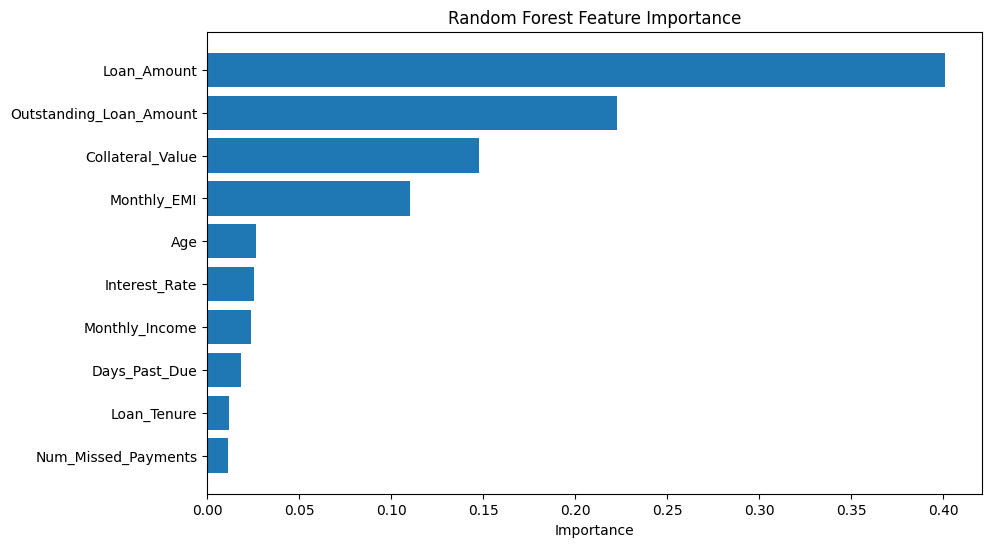

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance from the trained model
feature_importances = pd.DataFrame({
    'feature': X_train.columns, # Assuming X_train is your training feature DataFrame
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot it
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis() # Most important on top
plt.show()